<a href="https://colab.research.google.com/github/suryapratapkhuntia/Machine-Learning-End_to_end_project/blob/main/bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd


In [46]:
df=pd.read_csv('/content/archive (14).zip')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
16,5.4,3.9,1.3,0.4,setosa
30,4.8,3.1,1.6,0.2,setosa
131,7.9,3.8,6.4,2.0,virginica
106,4.9,2.5,4.5,1.7,virginica
142,5.8,2.7,5.1,1.9,virginica


In [53]:
df.describe()

,sepal_width,petal_length,species
count,100.000000,100.000000,100.000000
mean,3.045000,3.863000,1.050000
std,0.412035,1.722264,0.808728
min,2.200000,1.000000,0.000000
25%,2.800000,1.600000,0.000000
50%,3.000000,4.500000,1.000000
75%,3.400000,5.100000,2.000000
max,4.000000,6.700000,2.000000


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
19,5.1,3.8,1.5,0.3,0
22,4.6,3.6,1.0,0.2,0
32,5.2,4.1,1.5,0.1,0
110,6.5,3.2,5.1,2.0,2
96,5.7,2.9,4.2,1.3,1


In [49]:
df=df[['sepal_width','petal_length','species']]
df.sample(5)

,sepal_width,petal_length,species
13,3.0,1.1,0
83,2.7,5.1,1
131,3.8,6.4,2
62,2.2,4.0,1
55,2.8,4.5,1


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

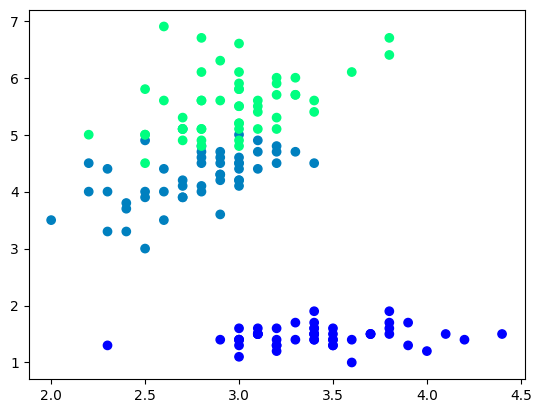

In [22]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')
plt.show()

In [51]:
df.sample(5)

,sepal_width,petal_length,species
130,2.8,6.1,2
19,3.8,1.5,0
10,3.7,1.5,0
98,2.5,3.0,1
40,3.5,1.3,0


In [54]:
df=df.sample(100)
df_train=df.iloc[:80,:].sample(50)
df_val=df.iloc[40:80,:].sample(25)
df_test=df.iloc[80:,:].sample(15)

In [55]:
df_val

,sepal_width,petal_length,species
31,3.4,1.5,0
82,2.7,3.9,1
49,3.3,1.4,0
110,3.2,5.1,2
0,3.5,1.4,0
109,3.6,6.1,2
24,3.4,1.9,0
26,3.4,1.6,0
105,3.0,6.6,2
89,2.5,4.0,1


In [56]:
x_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [57]:
x_test

array([[3.4, 1.5],
       [2.7, 3.9],
       [3.3, 1.4],
       [3.2, 5.1],
       [3.5, 1.4],
       [3.6, 6.1],
       [3.4, 1.9],
       [3.4, 1.6],
       [3. , 6.6],
       [2.5, 4. ],
       [3.9, 1.3],
       [2.5, 4.5],
       [3.3, 5.7],
       [2.5, 3. ],
       [2.8, 4.8],
       [3. , 5.8],
       [3.5, 1.4],
       [2.8, 4.5],
       [2.7, 5.3],
       [2.2, 5. ],
       [2.7, 4.1],
       [2.5, 5. ],
       [3.4, 1.4],
       [3.1, 4.4],
       [2.3, 1.3]])

**Bagging**

In [58]:
df_bag=df_train.sample(8,replace=True)

x=df_bag.iloc[:,0:2].values
y=df_bag.iloc[:,-1].values

df_bag

,sepal_width,petal_length,species
47,3.2,1.4,0
21,3.7,1.5,0
101,2.7,5.1,2
105,3.0,6.6,2
76,2.8,4.8,1
129,3.0,5.8,2
4,3.6,1.4,0
11,3.4,1.6,0


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [60]:
def evaluate(model, x, y):
  model.fit(x, y)

  plot_tree(model)
  plt.show()
  plot_decision_regions(x, y, model, legend=2)
  plt.show()
  y_pred = model.predict(x)

  print(f"Accuracy: {accuracy_score(y, y_pred)}")

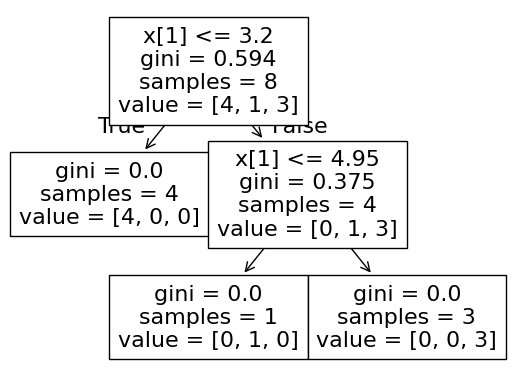

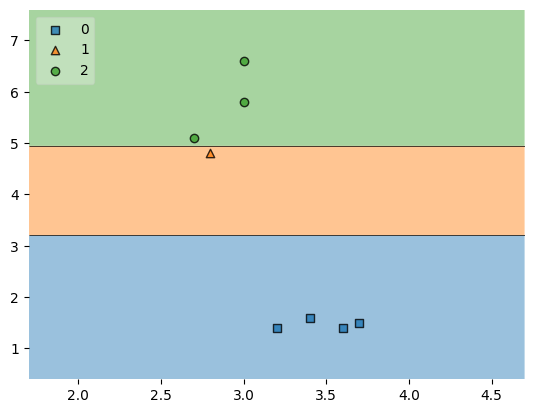

Accuracy: 1.0


In [61]:
dt_bag1= DecisionTreeClassifier()
evaluate(dt_bag1,x,y)

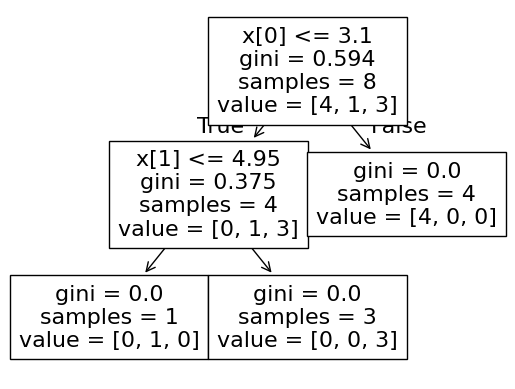

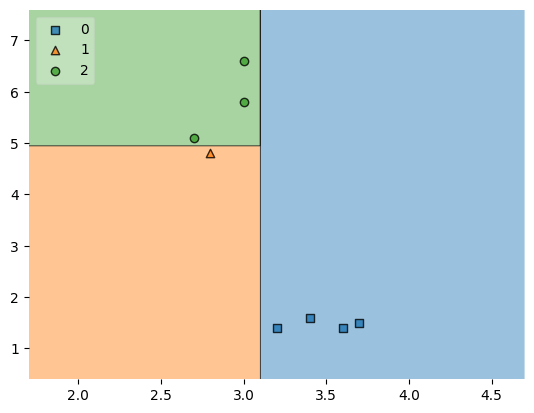

Accuracy: 1.0


In [62]:
dt_bag2= DecisionTreeClassifier()
evaluate(dt_bag2,x,y)

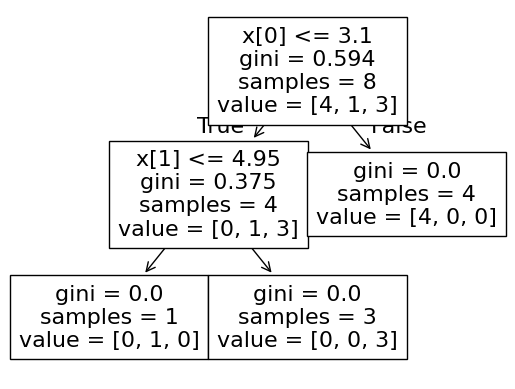

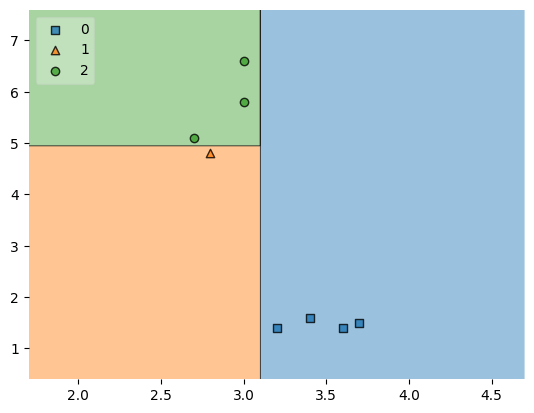

Accuracy: 1.0


In [63]:
dt_bag3= DecisionTreeClassifier()
evaluate(dt_bag3,x,y)

In [78]:
df_test.sample(5)

,sepal_width,petal_length,species
121,2.8,4.9,2
61,3.0,4.2,1
28,3.4,1.4,0
141,3.1,5.1,2
137,3.1,5.5,2


In [77]:
predict1 = dt_bag1.predict([[3.3,6.0]])
predict2 = dt_bag2.predict([[3.3,6.0]])
predict3 = dt_bag3.predict([[3.3,6.0]])



answer=(predict1+predict2+predict3)/3
print('answer',int(answer))

answer 0


/tmp/ipython-input-3625966886.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('answer',int(answer))
